# Workshop #7. Single-cell embeddings

## Task 1

Please, code (without using ready-to-go single-cell tools) one of the following dimensionality reduction and describe similarities / dissimilarities with PCA in resulting embedding. Feel free in methods and interpretation — creativity is a key:

1. LDA,
2. VAE,
3. ICA.

In [4]:
!pip install scanpy scikit-learn

In [6]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import numpy as np

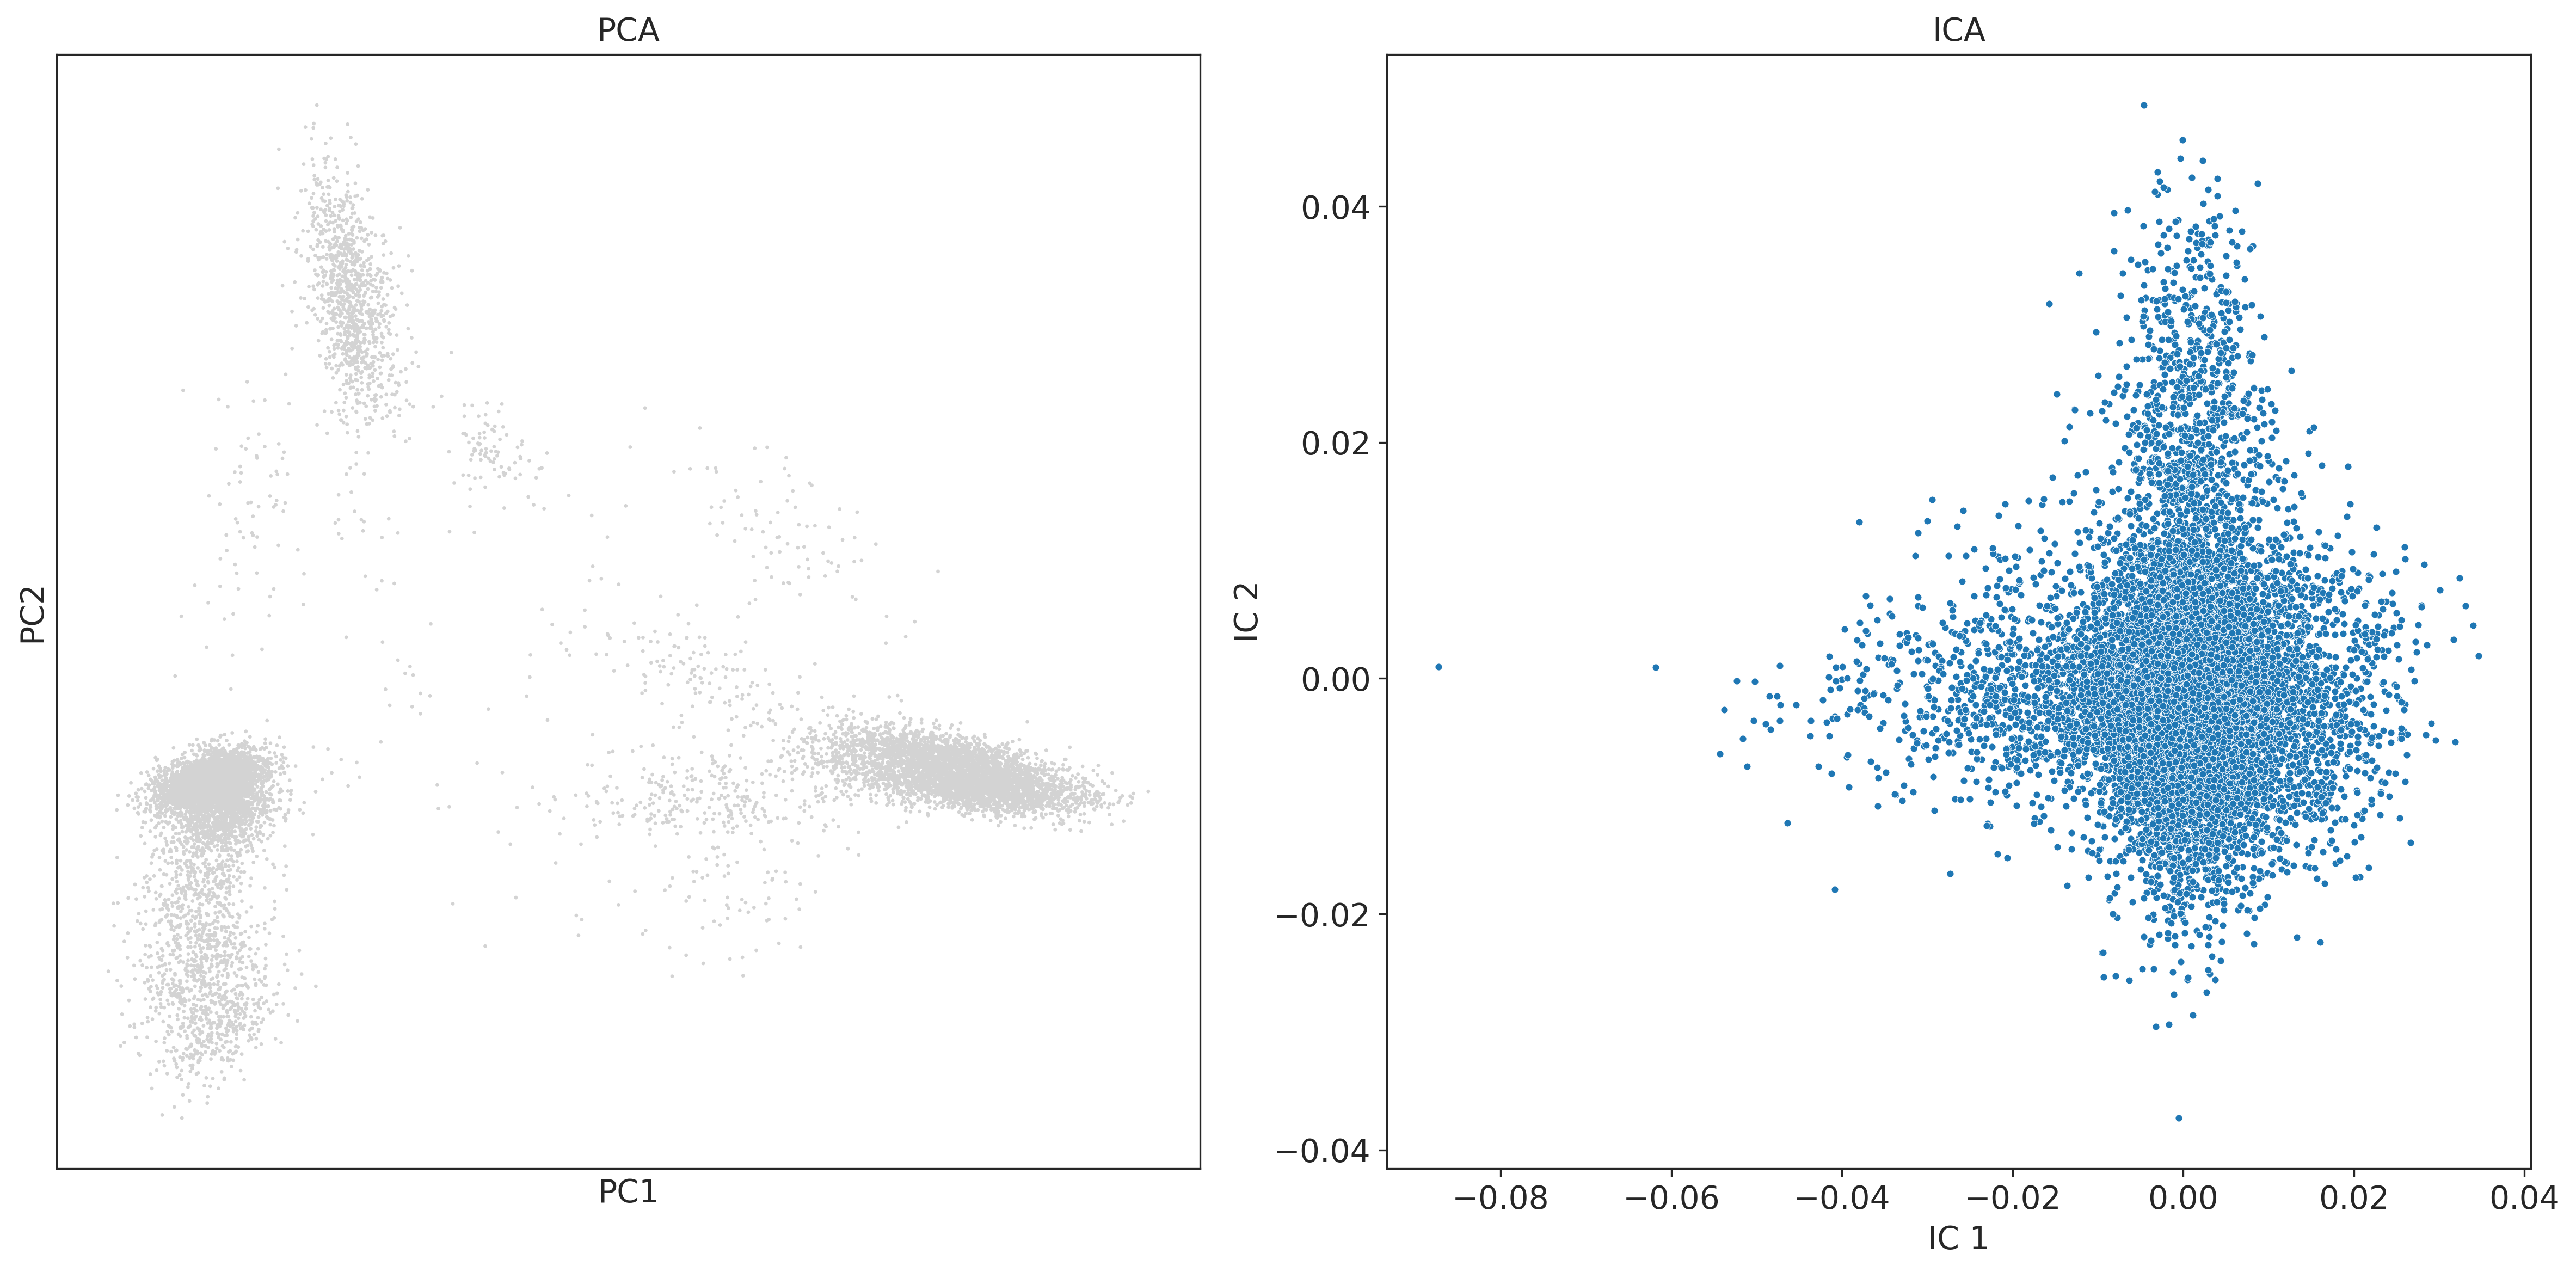

Explained variance ratio by PCA components: 0.2758465


In [8]:
# ICA
ica = FastICA(n_components=20, random_state=0)
ica_result = ica.fit_transform(adata.X.toarray())
adata.obsm['X_ica'] = ica_result

# Scatter plot of PCA and ICA results
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# PCA scatter plot
sc.pl.pca(adata, ax=axes[0], show=False)
axes[0].set_title('PCA')

# ICA scatter plot
sns.scatterplot(x=ica_result[:, 0], y=ica_result[:, 1], ax=axes[1], s=10)
axes[1].set_title('ICA')
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')

plt.tight_layout()
plt.show()

print("Explained variance ratio by PCA components:", np.sum(adata.uns['pca']['variance_ratio']))


ICA focuses on statistical independence, not maximum varience directions like PCA, potentially capturing more interpretable biological signals
